In [45]:
import pandas as pd
sales = pd.read_csv('cleaned data/sales_c.csv', encoding = 'utf-8', dtype = {'Quantity':'Int8', 'Store ID':'Int8', 'Employee ID':'Int8'})
group_sales = pd.read_csv('cleaned data/group_sales_c.csv', encoding = 'utf-8', dtype = {'Quantity':'Int8', 'Store ID':'Int8', 'Employee ID':'Int8'})
customers = pd.read_csv('cleaned data/customers_c.csv', encoding = 'utf-8',
                        usecols = ['Customer ID', 'Name', 'City', 'Gender', 'Date Of Birth'],
                        dtype = {'Customer ID':'Int32', 'Gender':'category'})
employees = pd.read_csv('cleaned data/employees_c.csv', encoding = 'utf-8', dtype = {'Employee ID':'Int16', 'Store ID':'Int8'})
products = pd.read_csv('cleaned data/products_c.csv', encoding = 'utf-8', dtype = {'Product ID':'Int32', 'Category':'category'})
stores = pd.read_csv('cleaned data/stores_c.csv', encoding = 'utf-8', dtype = {'Store ID':'Int8', 'Number of Employees':'Int8'})

In [46]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436188 entries, 0 to 436187
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Invoice ID     436188 non-null  object 
 1   Customer ID    436188 non-null  int64  
 2   Product ID     436188 non-null  int64  
 3   Unit Price     436188 non-null  float64
 4   Quantity       436188 non-null  Int8   
 5   Date           436188 non-null  object 
 6   Discount       436188 non-null  float64
 7   Line Total     436188 non-null  float64
 8   Store ID       436188 non-null  Int8   
 9   Employee ID    436188 non-null  Int8   
 10  Invoice Total  436188 non-null  float64
dtypes: Int8(3), float64(4), int64(2), object(2)
memory usage: 29.1+ MB


In [47]:
# analisis

# total sale each months over years
sales = sales.astype({'Date':'datetime64[ns]'})
sales[['Line Total', 'Invoice Total']] = sales[['Line Total', 'Invoice Total']].round(2)
((sales.pivot_table(index = [sales['Date'].dt.year], columns = [sales['Date'].dt.month], values = 'Invoice Total', aggfunc = 'sum')/1e6).
        rename_axis(index='Year', columns='Month').
# The purpose of dividing 1 million by the total amount is for an intuitive outcome    
        style.background_gradient(cmap = 'RdYlGn', axis = 1))

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2023,1.403140,0.600021,1.672474,1.541252,1.263241,1.057276,1.313178,0.836403,2.284253,2.250397,1.524134,3.981947
2024,1.254086,0.481657,1.821752,1.320852,1.288256,1.188370,0.842321,1.058626,1.982790,2.081192,1.566525,3.121135
2025,3.122089,1.148892,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


<Axes: title={'center': 'Peak of sales in a day'}, xlabel='Time (24-hour clock)', ylabel='Total sales(million)'>

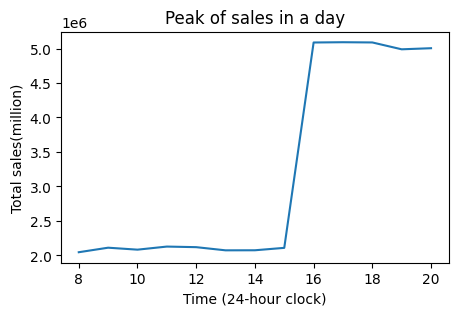

In [48]:
# sales trend over time
# total sales by time period
(sales.groupby([sales['Date'].dt.hour])['Invoice Total'].sum()).plot(figsize = (5,3), title = 'Peak of sales in a day', xlabel = 'Time (24-hour clock)', ylabel = 'Total sales(million)')

In [49]:
# product performance
# merge two table 'sales' and 'products' for the favoring of analysis
s_p = sales.merge(products, how = 'inner', left_on = 'Product ID', right_on = 'Product ID')
s_p.head()

,Invoice ID,Customer ID,Product ID,Unit Price,Quantity,Date,Discount,Line Total,Store ID,Employee ID,Invoice Total,Category,Sub Category,Production Cost
0,INV-US-001-04128642,268,1130,59.0,1,2023-01-01 20:23:00,0.4,35.4,1,5,144.9,Masculine,Coats and Blazers,42.21
1,INV-US-001-04128642,268,1694,34.5,1,2023-01-01 20:23:00,0.4,20.7,1,5,144.9,Feminine,Shirts and Blouses,5.66
2,INV-US-001-04128642,268,35,29.0,1,2023-01-01 20:23:00,0.4,17.4,1,5,144.9,Feminine,Sportswear,8.15
3,INV-US-001-04128642,268,1340,25.5,1,2023-01-01 20:23:00,0.4,15.3,1,5,144.9,Masculine,T-shirts and Polos,16.24
4,INV-US-001-04128642,268,2202,24.5,1,2023-01-01 20:23:00,0.4,14.7,1,5,144.9,Masculine,Sportswear,3.73


In [50]:
# the top 10 popular products
s_p.groupby(['Product ID', 'Sub Category'])['Quantity'].sum().sort_values(ascending = False).head(10)

Product ID  Sub Category      
13798       Sportswear            122
13642       Sportswear            121
14341       Shirts                120
12680       Sportswear            118
12186       Sportswear            117
14370       Sportswear            116
13899       Shirts                115
14444       T-shirts and Polos    114
13460       Sportswear            113
14080       T-shirts and Polos    113
Name: Quantity, dtype: Int8

In [51]:
# 10 most profitable products
s_p['Total Profit'] =s_p.apply(lambda x:(x['Line Total']-(x['Production Cost']*x['Quantity'])), axis = 1)
s_p.groupby(['Product ID', 'Sub Category'])['Total Profit'].sum().sort_values(ascending = False).head(10)

Product ID  Sub Category     
7583        Suits and Blazers    7369.95
13641       Suits and Blazers    6357.68
14083       Suits and Blazers    6348.96
12596       Coats and Blazers    5945.50
12003       Suits and Blazers    5918.70
12748       Suits and Sets       5713.65
8207        Suits and Blazers    5676.02
14109       Suits and Blazers    5533.27
13537       Suits and Blazers    5392.59
12574       Pants and Jeans      5385.97
Name: Total Profit, dtype: float64

In [52]:
# 10 most unprofitable products
s_p.groupby(['Product ID', 'Sub Category'])['Total Profit'].sum().sort_values().head(10)

Product ID  Sub Category     
355         Suits and Blazers   -300.64
1256        Suits and Sets      -259.98
1655        Suits and Blazers   -257.66
381         Suits and Blazers   -223.56
2045        Suits and Blazers   -177.14
199         Suits and Blazers   -174.34
554         Suits and Sets      -169.81
1525        Suits and Blazers   -168.34
2939        Coats and Blazers   -168.32
200         Sportswear          -163.90
Name: Total Profit, dtype: float64

<Axes: title={'center': 'Totoal profit each month'}, ylabel='Total Profit (million)'>

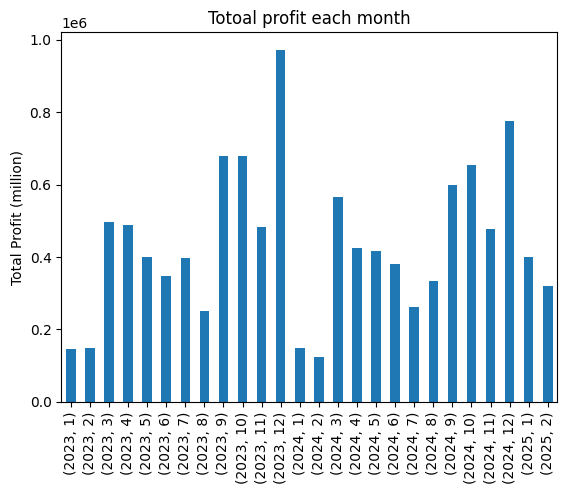

In [53]:
# profit of each month
s_p.groupby([s_p['Date'].dt.year, s_p['Date'].dt.month])['Total Profit'].sum().plot.bar(title = 'Totoal profit each month', xlabel = '', ylabel = 'Total Profit (million)')

In [54]:
# 5 most profitable product in Sep 2023
s_p.loc[(s_p['Date'].dt.year == 2023) & (s_p['Date'].dt.month == 8)].groupby(['Sub Category','Product ID'])['Total Profit'].sum().sort_values(ascending = False).head()

Sub Category       Product ID
Suits and Blazers  3189          876.42
Coats and Blazers  4302          835.56
Suits and Sets     4038          832.72
Suits and Blazers  3735          760.10
                   4697          738.85
Name: Total Profit, dtype: float64

In [55]:
# employees perform
s_p_e = s_p.merge(employees, how = 'inner', left_on = 'Employee ID', right_on = 'Employee ID')
s_p_e.groupby(['Employee ID','Store ID_x','Name']).agg({'Total Profit':'sum'})

,,,Total Profit
Employee ID,Store ID_x,Name,
2,1,Gabriel Cunningham,2305239.63
3,1,Timothy Fernandez,2276107.76
4,1,Natalie Rogers,2264375.33
5,1,Elizabeth Cantrell,2254691.51
6,1,Melissa Tran,2275585.95


In [56]:
# the most frequent customers and their average spending
gs_c = group_sales.merge(customers, how = 'inner', on = 'Customer ID')
purchase_times = gs_c.groupby(['Customer ID', 'Gender']).agg({'Invoice ID':'count', 'Invoice Total':'sum'})
purchase_times.rename(columns = {'Invoice ID':'Purchase times'}, inplace = True)
purchase_times.sort_values(['Purchase times'], ascending = False).head(10)

C:\Users\123\AppData\Local\Temp\ipykernel_36688\457328901.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  purchase_times = gs_c.groupby(['Customer ID', 'Gender']).agg({'Invoice ID':'count', 'Invoice Total':'sum'})


,,Purchase times,Invoice Total
Customer ID,Gender,,
47005,F,24,1400.65
37304,F,23,1436.83
20159,F,23,1459.53
6520,F,22,963.36
15084,F,22,1691.61
16632,F,22,1090.40
10005,F,22,1458.60
6130,F,21,927.60
9610,F,21,1495.35


<Axes: title={'center': 'Most popular product among the top 100 frequent customers'}, ylabel='Quantity'>

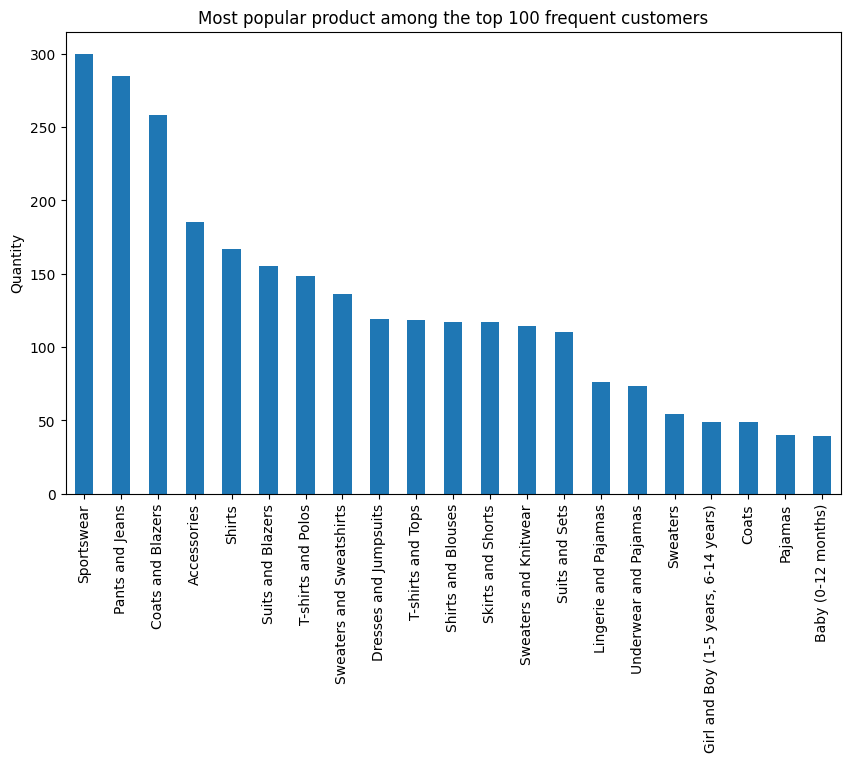

In [57]:
# Most popular product among the top 100 frequent customers

# the most 100 frequent consumers
best100 = purchase_times.sort_values('Purchase times', ascending = False).reset_index().head(100)
# append customer id to a list 
best100list = best100['Customer ID'].tolist()
# merge sales and products 
s_p = sales.merge(products, how = 'inner', left_on = 'Product ID', right_on = 'Product ID')
# count the most 5 popular subcategory
s_p.loc[s_p['Customer ID'].isin(best100list)].value_counts('Sub Category').plot.bar(figsize = (10,6),title = 'Most popular product among the top 100 frequent customers', xlabel = '', ylabel = 'Quantity')

C:\Users\123\AppData\Local\Temp\ipykernel_36688\4030331245.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gs_c.groupby('Gender')['Invoice Total'].mean().plot.bar(figsize = (3,3), color = ['yellow', 'pink', 'blue'])


<Axes: xlabel='Gender'>

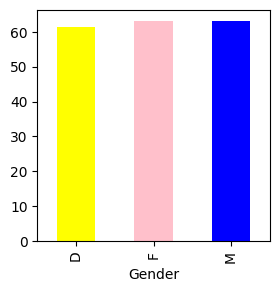

In [58]:
# gender-based purchasing pattern
# average spending of order by gender-based
gs_c = group_sales.merge(customers, how = 'inner', on = 'Customer ID')
gs_c.groupby('Gender')['Invoice Total'].mean().plot.bar(figsize = (3,3), color = ['yellow', 'pink', 'blue'])

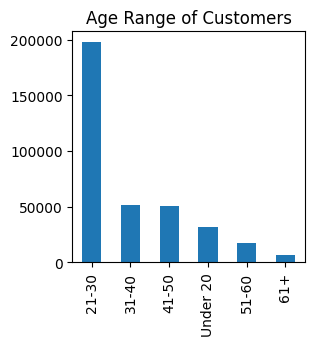

In [59]:
# calculate the age of customers
import datetime
customers = customers.astype({'Date Of Birth':'datetime64[ns]'})
current = datetime.datetime.now()
customers['Age'] = customers.apply(lambda x:(current.year) - (x['Date Of Birth'].year), axis = 1)

# range of age 
bins = [0, 20, 30, 40, 50, 60, 100]  # range
labels = ['Under 20', '21-30', '31-40', '41-50', '51-60', '61+'] 

customers['Age Group'] = pd.cut(customers['Age'], bins=bins, labels=labels, right=False)
customers['Age Group'].value_counts().plot.bar(figsize = (3,3), title = 'Age Range of Customers', xlabel = '')

# merge 'customers' and 'group_sales' for analysis in Power BI
gs_c = group_sales.merge(customers, how = 'inner', on = 'Customer ID')
gs_c.to_csv('cleaned data/gs_c.csv', encoding = 'utf-8', index = False)

C:\Users\123\AppData\Local\Temp\ipykernel_36688\1499686756.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gs_c.groupby('Age Group')['Invoice Total'].mean().plot(figsize = (3,3))


<Axes: xlabel='Age Group'>

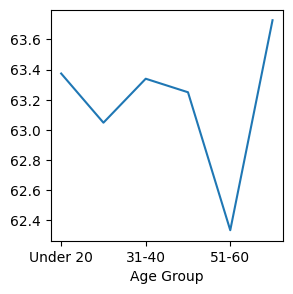

In [60]:
# average amount of order by age range
gs_c.groupby('Age Group')['Invoice Total'].mean().plot(figsize = (3,3))